# 紅酒品質 改良版
這是多變量分析報告的同筆資料，多變量分析報告的連結在此：https://drive.google.com/drive/my-drive</P>
至於為何重做，主要的理由如下：
1. 該報告須配合課程教學的內容，故受到一部份的限制。
2. 資料分析的過程會更完整一些
3. 從R改成python進行分析

*參考資料*
https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer</P>
https://www.kaggle.com/code/vishalyo990/prediction-of-quality-of-wine</P>
https://www.kaggle.com/code/amirhosseinzinati/red-wine-quality-random-forest-classification</P>


## 一、資料、變數介紹與預測目標
### 1.1 資料介紹
資料來自Kaggle網站：https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009。</P>
資料內容係自2004年5月至2007年2月期間由官方認證機構 CVRVV 收集而來，並透過系統 iLab 紀錄的1599個紅葡萄酒樣本。</P>
我們希望藉由這資料找到對紅酒品質有影響的變數，並藉此建立預測效果較佳的模型。
### 1.2 變數介紹
本次資料共有12個變數，分別為：
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides:氯化物
6.  free sulfur dioxide
7.  total sulfur dioxide
8.  density
9.  pH
10. sulphates:硫酸鹽
11. alcohol:濃度
12. quality (score between 0 and 10)
其中，Quality亦是我們要預測的對象。

## 二、資料預處理
在資料預處理上，我們分為幾個步驟
1. 確認各變數型態
2. 遺失值
3. 原始資料敘述統計
4. 變數間相關性
5. 資料調整

### 2.1 變數資料型態 + 2.2 遺失值
我們先要看各項變數的資料型態與分布，以決定接下來對各項變數的處理方式。</P>
根據結果，除了應變數(quality)為整數，其他皆為浮點數。同時，透過Non-Null Count，可以看到每筆資料都有完好存在，沒有遺失值的問題。


In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Random forest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
#Metrics
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv("./data/winequality-red.csv")
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### 2.3 原始資料敘述統計
這部分將會簡單透過不同的圖展現出各變數的分布狀況</P>
首先，我們先看應變數的分布情形。透過下圖可以看到資料筆數有點不平均，品質5與6的酒就佔了超過半數。</P>


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


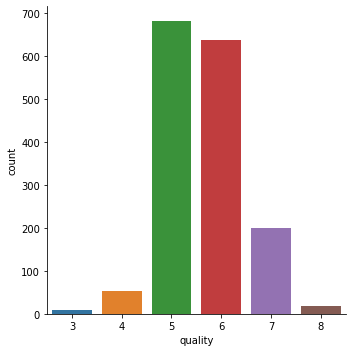

In [52]:
df=data.copy()
print(df.iloc[:,11].value_counts())
plot= sns.catplot(x='quality', data = df, kind = 'count')

#### 自變數資料


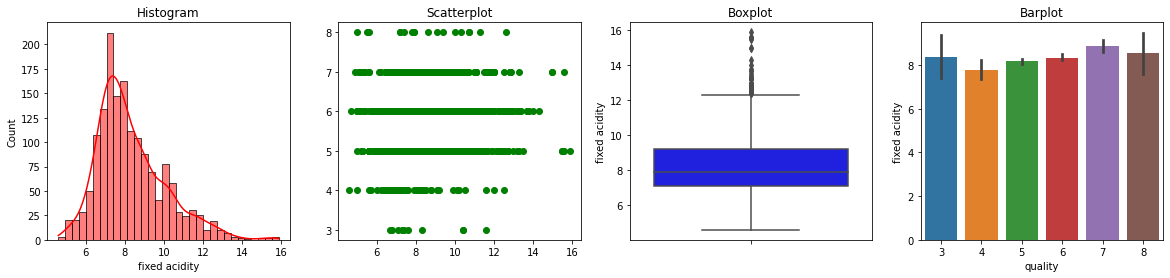

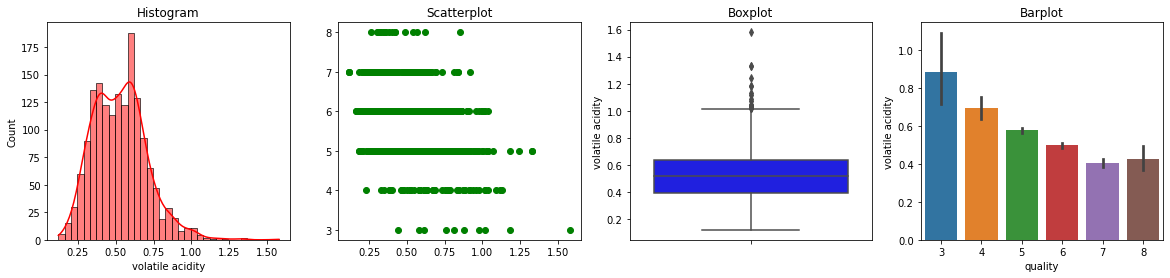

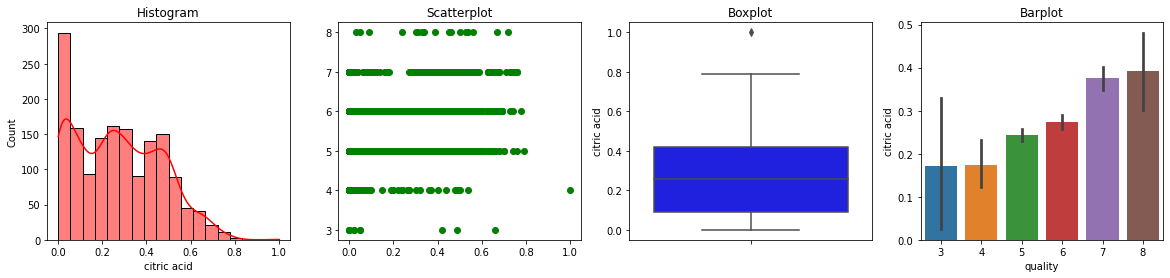

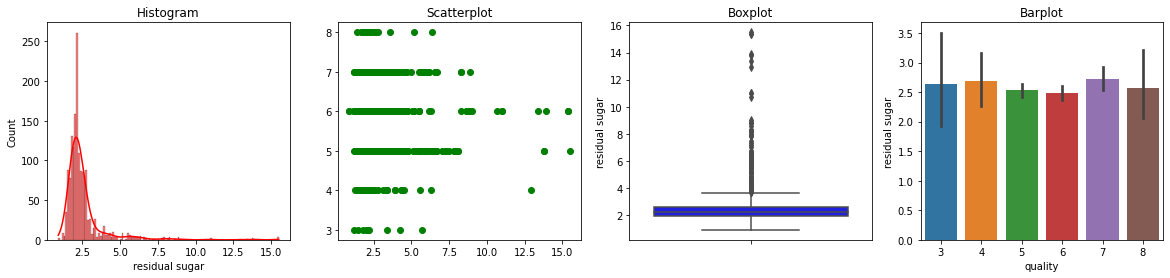

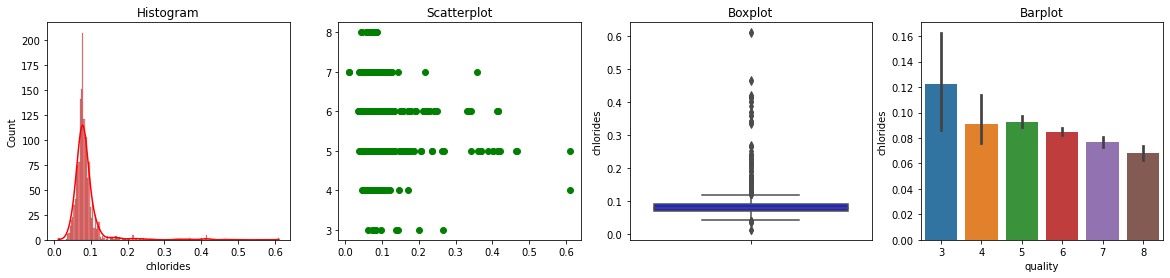

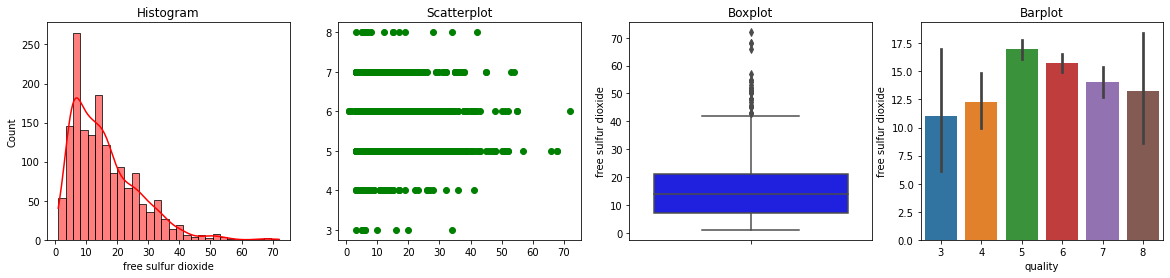

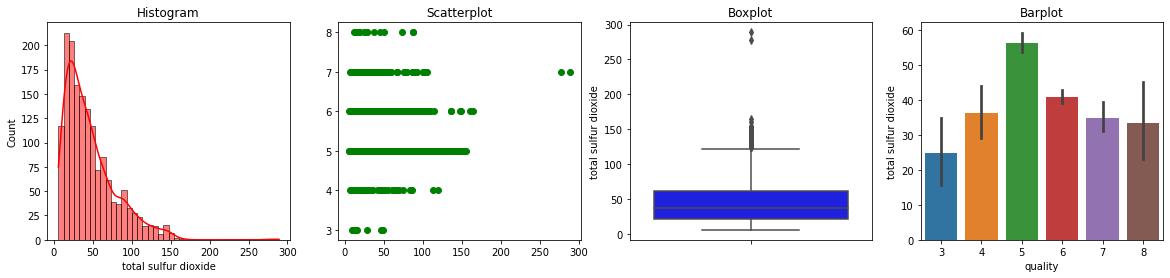

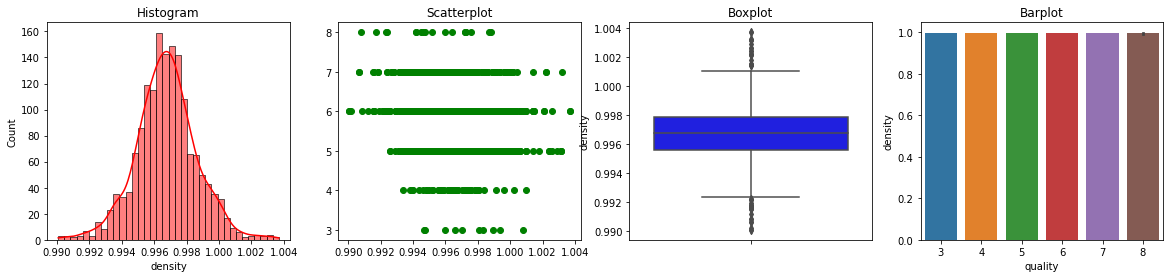

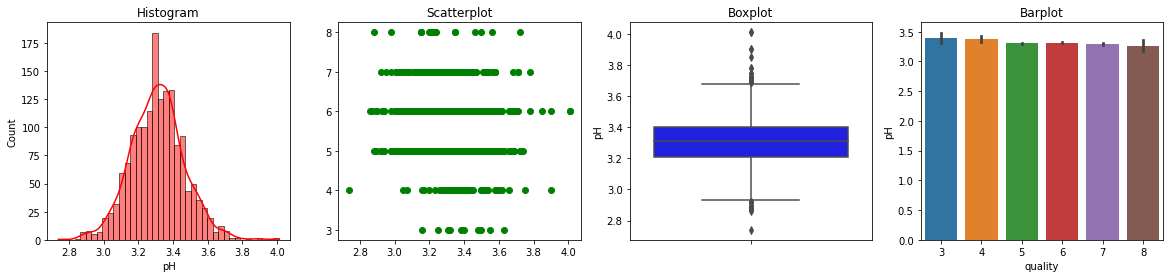

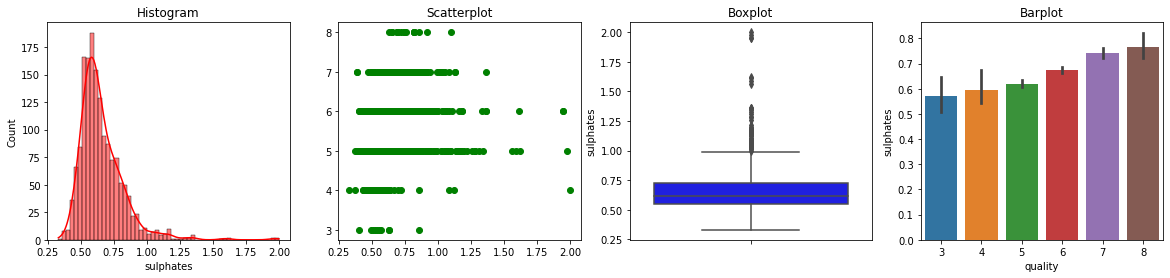

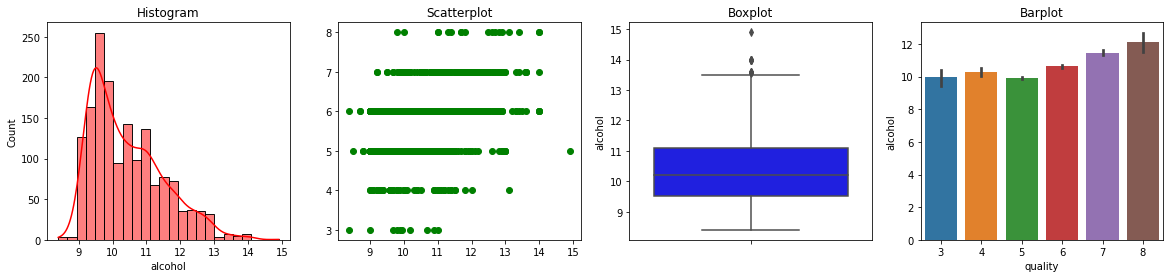

In [53]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')

    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    plt.show()

for col in df.iloc[:,0:11]:
    diagnostic_plots(df,col,'quality')

#### 處理離群值
我們利用最常見的方式進行處理，將 Q3+1.5*IQR(四分位距) 與 Q1-1.5IQR 的資料刪除。</P>
https://ithelp.ithome.com.tw/articles/10278000

C:\Users\user\AppData\Local\Temp\ipykernel_41096\3404390126.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\user\AppData\Local\Temp\ipykernel_41096\3404390126.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]


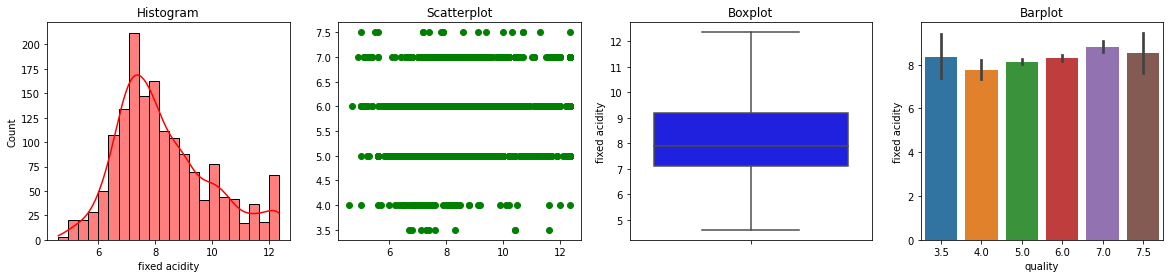

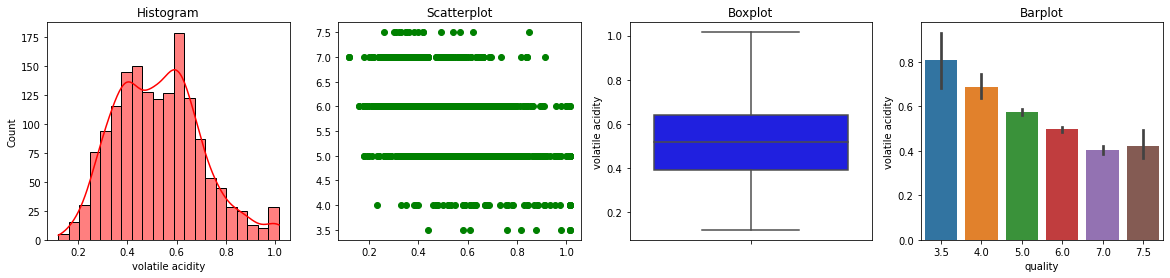

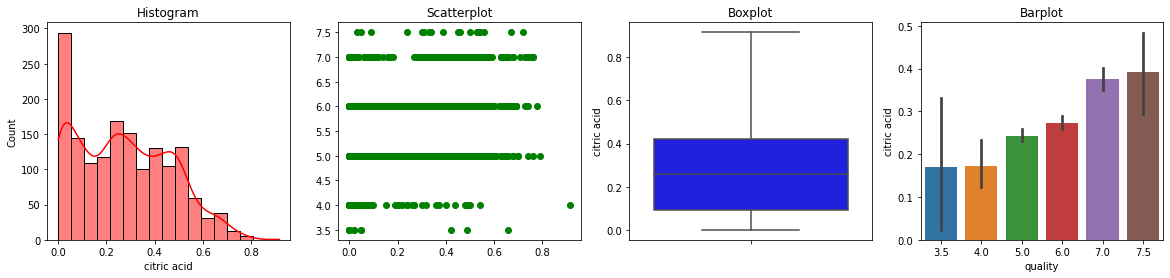

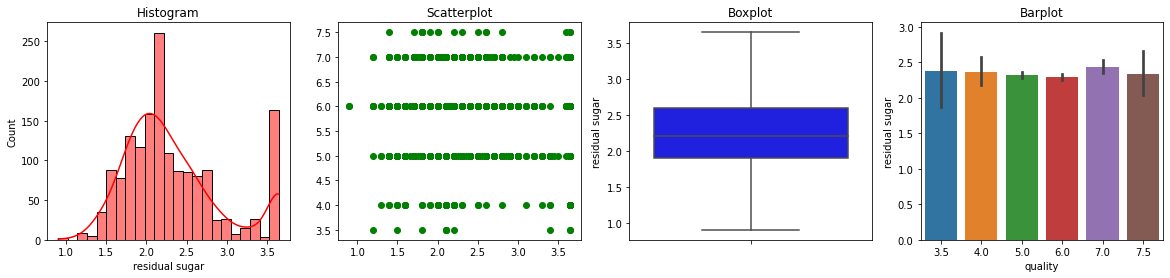

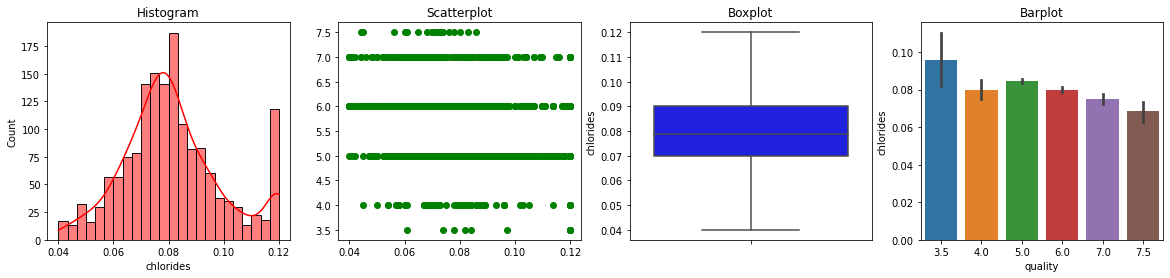

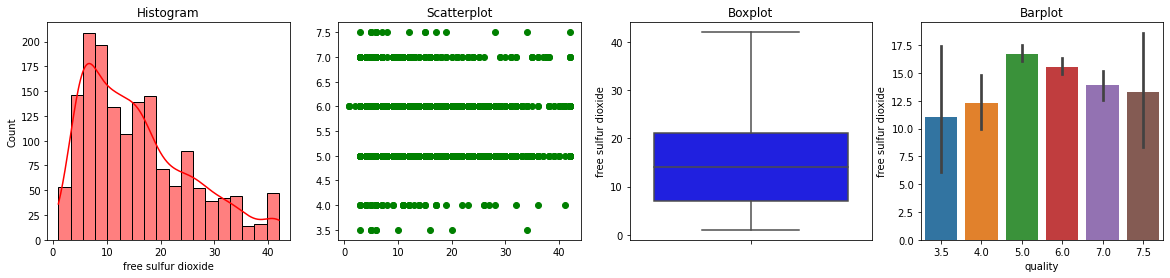

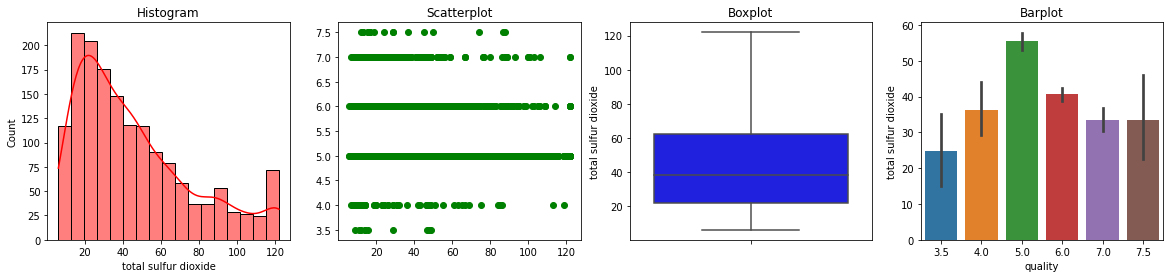

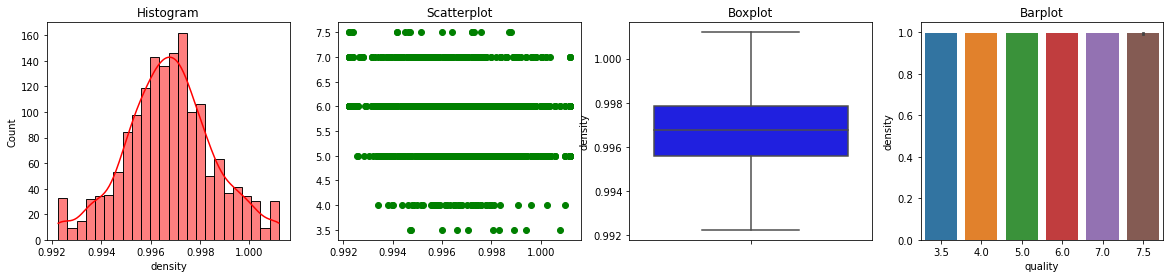

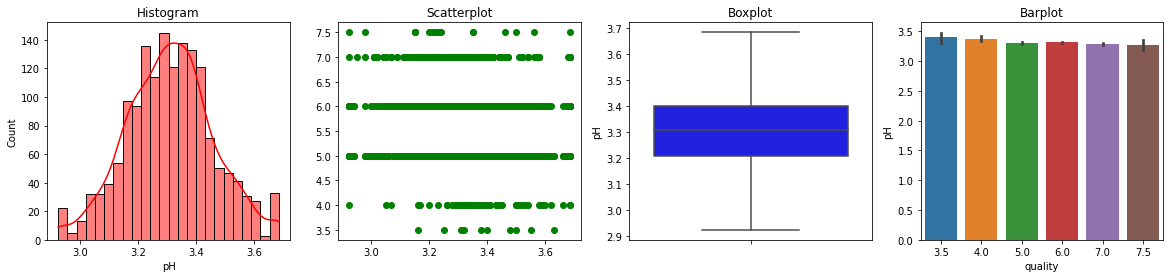

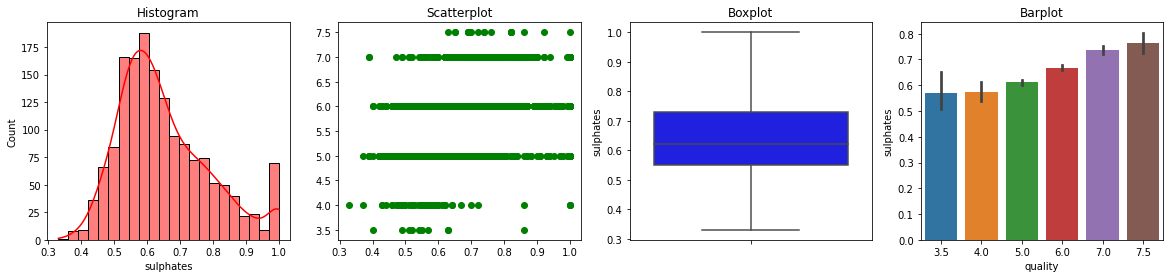

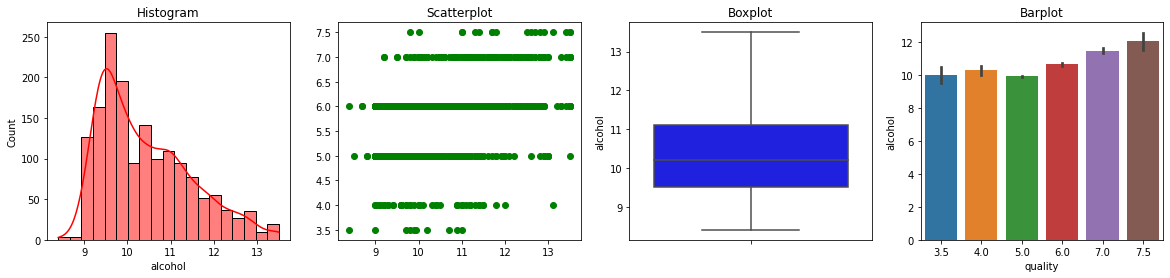

In [54]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df1 = mod_outlier(df)
for col in df1.iloc[:,0:11]:
    diagnostic_plots(df1,col,'quality')
    


#### 刪除重覆資料

In [55]:
df2=df1.drop_duplicates()
for col in ['fixed acidity','total sulfur dioxide','free sulfur dioxide','sulphates','alcohol']:
    df2[col]=np.log(df2[col])

C:\Users\user\AppData\Local\Temp\ipykernel_41096\4195731070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=np.log(df2[col])


#### 相關性

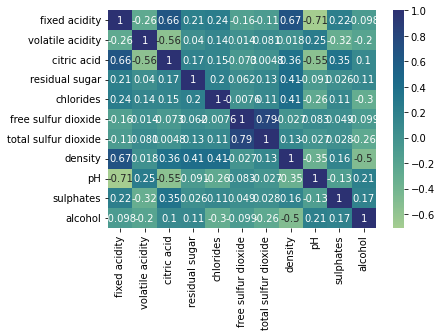

In [56]:
dataplot = sns.heatmap(df2.drop('quality', axis = 1).corr(), cmap="crest", annot=True)

quality                 1.000000
alcohol                 0.480641
sulphates               0.330712
citric acid             0.227717
fixed acidity           0.128373
residual sugar          0.024647
free sulfur dioxide    -0.052357
pH                     -0.059040
density                -0.174567
chlorides              -0.180356
total sulfur dioxide   -0.207643
volatile acidity       -0.388883
Name: quality, dtype: float64 



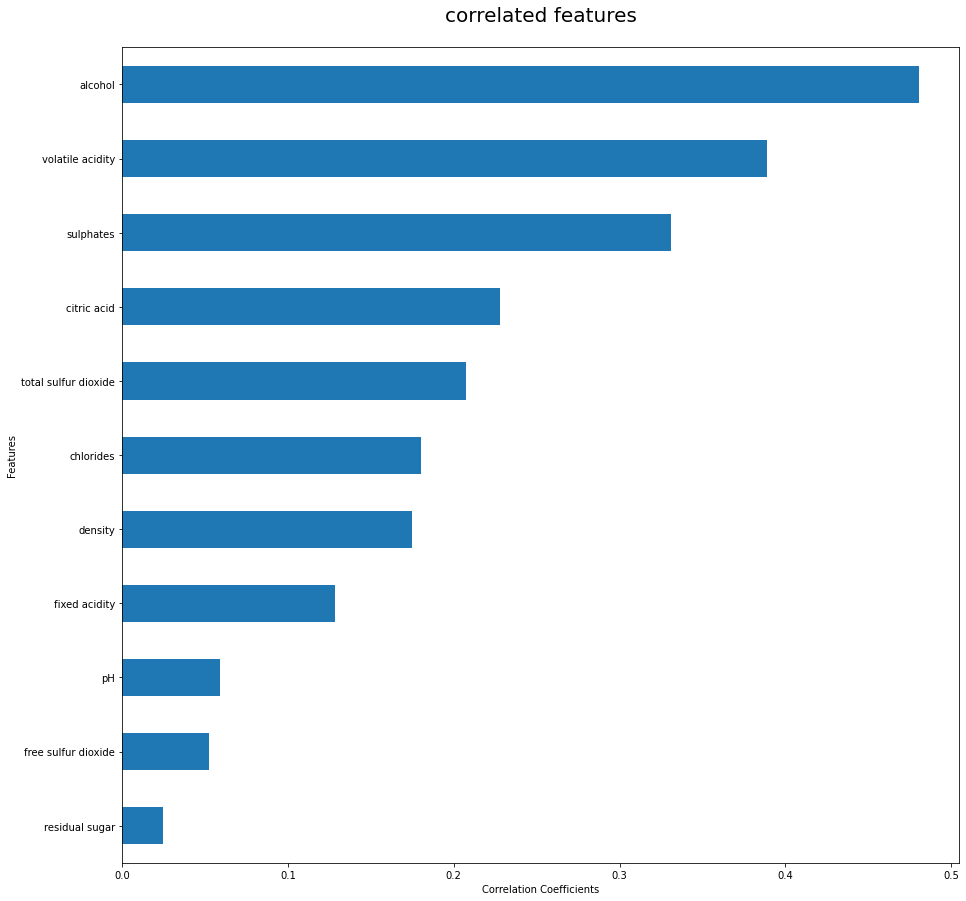

In [57]:
correlation = df1.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')


plt.figure(figsize=(15,15))
df1.corr()['quality'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:12][::-1].plot(kind='barh') 
plt.title("correlated features", size=20, pad=26)
plt.xlabel("Correlation Coefficients")
plt.ylabel("Features")
plt.show()

### 資料分割

In [58]:
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins, labels = group_names)

from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

df1['quality'] = label_quality.fit_transform(df1['quality'])
df1['quality'] = label_quality.fit_transform(df1['quality'])


In [59]:
X = df1.drop('quality', axis = 1)
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### SVM

In [60]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



#### K-fold
https://ithelp.ithome.com.tw/articles/10197461


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

accuracy = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(accuracy)
print(accuracy.mean()*100, '%')

[0.60625    0.7625     0.69375    0.64375    0.6125     0.65625
 0.64375    0.5375     0.625      0.56603774]
63.472877358490564 %


#### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

temp = 0
for x in range(5,31):
    knn = KNeighborsClassifier(n_neighbors=x)
    accuracy = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    if accuracy.mean()*100 > temp:
        temp = accuracy.mean()*100
        best = x
    #print(accuracy)

print('best neighborhood is : ', best, ', accuracy is ', temp, '%')


best neighborhood is :  23 , accuracy is  65.5381289308176 %
